# Comparative Analysis
In this notebook, we compare ClaSS with competitors.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np

import pandas as pd

pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys

sys.path.append("../../")

Let's choose a score for evaluation (F1 or Covering).

In [3]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [4]:
competitors = ["ADWIN", "HDDM", "NEWMA", "ChangeFinder", "DDM", "Window", "FLOSS", "ClaSS"]
dataset = "PAMAP"
methods = list()

for candidate_name in competitors:
    methods.append((candidate_name, f"{candidate_name}.csv.gz"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../../experiments/competitor_{dataset}/{file_name}",
                                     usecols=["dataset", eval_score], compression="gzip")

df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]

df_scores

,dataset,ADWIN,HDDM,NEWMA,ChangeFinder,DDM,Window,FLOSS,ClaSS
0,PAMAP_Indoor_Subject1_IMU_Shoe_X-Acc,0.444,0.258,0.136,0.672,0.136,0.218,0.466,0.484
1,PAMAP_Indoor_Subject1_IMU_Shoe_Y-Acc,0.292,0.246,0.136,0.589,0.136,0.388,0.439,0.488
2,PAMAP_Indoor_Subject1_IMU_Shoe_Z-Acc,0.449,0.349,0.136,0.442,0.270,0.238,0.330,0.487
3,PAMAP_Indoor_Subject1_IMU_Shoe_X-Gyro,0.356,0.312,0.136,0.340,0.279,0.136,0.608,0.565
4,PAMAP_Indoor_Subject1_IMU_Shoe_Y-Gyro,0.453,0.243,0.136,0.363,0.136,0.136,0.573,0.475
5,PAMAP_Indoor_Subject1_IMU_Shoe_Z-Gyro,0.407,0.234,0.136,0.424,0.277,0.136,0.413,0.573
6,PAMAP_Indoor_Subject1_IMU_Shoe_X-Mag,0.381,0.397,0.136,0.675,0.265,0.695,0.378,0.576
7,PAMAP_Indoor_Subject1_IMU_Shoe_Y-Mag,0.277,0.379,0.136,0.582,0.136,0.659,0.337,0.376
8,PAMAP_Indoor_Subject1_IMU_Shoe_Z-Mag,0.440,0.376,0.136,0.707,0.136,0.469,0.409,0.518
9,PAMAP_Indoor_Subject2_IMU_Shoe_X-Acc,0.295,0.249,0.132,0.598,0.132,0.206,0.412,0.498


Let's calculate the mean/median/std score.

In [5]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4052/3088260556.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3)


ADWIN           0.354
HDDM            0.206
NEWMA           0.162
ChangeFinder    0.552
DDM             0.200
Window          0.344
FLOSS           0.378
ClaSS           0.536
dtype: float64

In [6]:
df_scores.median(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4052/803467923.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.median(axis=0).round(3)


ADWIN           0.360
HDDM            0.216
NEWMA           0.135
ChangeFinder    0.550
DDM             0.148
Window          0.315
FLOSS           0.382
ClaSS           0.499
dtype: float64

In [7]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4052/2527189798.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


ADWIN           0.165
HDDM            0.126
NEWMA           0.097
ChangeFinder    0.182
DDM             0.114
Window          0.215
FLOSS           0.126
ClaSS           0.174
dtype: float64

Let's compute the wins per method.

In [8]:
ranks = df_scores.rank(1, method='min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [9]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

ADWIN:wins=9 rank=3.99259
HDDM:wins=0 rank=5.93333
NEWMA:wins=0 rank=6.19259
ChangeFinder:wins=47 rank=2.05926
DDM:wins=1 rank=5.66667
Window:wins=20 rank=4.13333
FLOSS:wins=12 rank=3.99259
ClaSS:wins=47 rank=2.17037


Let's plot and output the ranks.

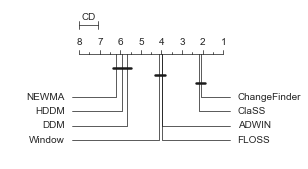

In [10]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, reverse=True, width=4,
                                      filename=f"../../figures/cd_comparative_{dataset}.pdf")  #

Let's compute wins/losses against ClaSS.

In [11]:
selection = "ClaSS"

for rival in df_scores.columns[1:]:
    if rival == selection: continue

    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method='min', ascending=False)

    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]

    assert wins + losses + ties == pair_ranks.shape[0]

    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

ClaSS vs ADWIN: (wins/ties/losses): 117/0/18
ClaSS vs HDDM: (wins/ties/losses): 129/0/6
ClaSS vs NEWMA: (wins/ties/losses): 135/0/0
ClaSS vs ChangeFinder: (wins/ties/losses): 66/2/67
ClaSS vs DDM: (wins/ties/losses): 133/0/2
ClaSS vs Window: (wins/ties/losses): 96/0/39
ClaSS vs FLOSS: (wins/ties/losses): 108/1/26


/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4052/3898032719.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4052/3898032719.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


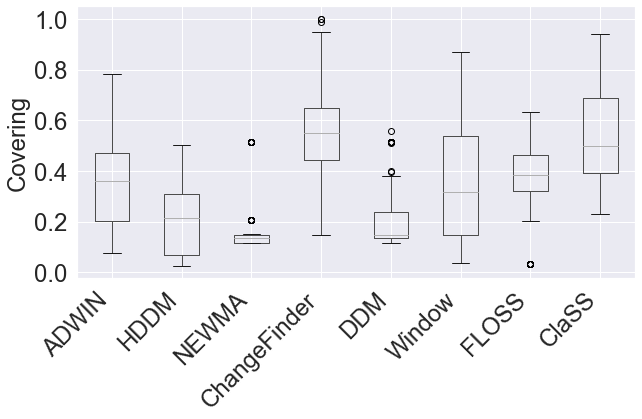

In [12]:
fontsize = 24
_, ax = plt.subplots(figsize=(10, 5))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

ax.set_xticklabels(df_scores.columns[1:], rotation=45, ha="right")
ax.set_yticks(np.round(np.arange(0, 1.0 + .2, .2), 1))

plt.savefig(f"../../figures/bp_comparative_{dataset}.pdf", bbox_inches="tight")